In [ ]:
#libraries 
import glob
import numpy as np 
import pandas as pd
import tensorflow as tf
import keras as k
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from google.colab import files

In [ ]:
#load the data 
from google.colab import files
uploaded = files.upload()

Saving ckd.csv to ckd (1).csv


In [ ]:
df = pd.read_csv("ckd.csv")
df.head()

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [ ]:
#Get the shape of the data (the number of rows & columns)
df.shape

(400, 25)

In [ ]:
#Create a list of columns to retain
columns_to_retain = ["Age" ,"Bp" ,"Sg", "Al", "Su", "Rbc", "Pc", "Pcc", "Bgr", 
                     "Pcv", "Wbcc", "Rbcc", "Htn", "Dm", "Appet", "Ane", "Class"]

In [ ]:
#columns_to_retain = df.columns, Drop the columns that are not in columns_to_retain
df = df.drop([col for col in df.columns if not col in columns_to_retain], axis=1)
    
# Drop the rows with na or missing values
df = df.dropna(axis=0)

In [ ]:
#Transform non-numeric columns into numerical columns
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

<ipython-input-428-5b9f87948f24>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-428-5b9f87948f24>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-428-5b9f87948f24>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-428-5b9f87948f24>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-428-5b9f87948f24>:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is d

In [ ]:
#@title Default title text
df.head()

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Bgr,Pcv,Wbcc,Rbcc,Htn,Dm,Appet,Ane,Class
0,36,8,3,1,0,0,2,1,21,30,69,30,2,1,1,1,0
1,60,5,3,4,0,0,2,1,146,24,53,45,1,0,1,1,0
2,52,8,1,2,3,2,2,1,114,17,67,45,1,1,2,2,0
3,36,7,0,4,0,2,1,2,17,18,59,17,2,0,2,2,0
4,40,8,1,2,0,2,2,1,6,21,65,24,1,0,1,1,0


In [ ]:
#Split the data
X = df.drop(["Class"], axis=1)
y = df["Class"]

In [ ]:
#Feature Scaling
x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names = X.columns
X[column_names] = x_scaler.transform(X)

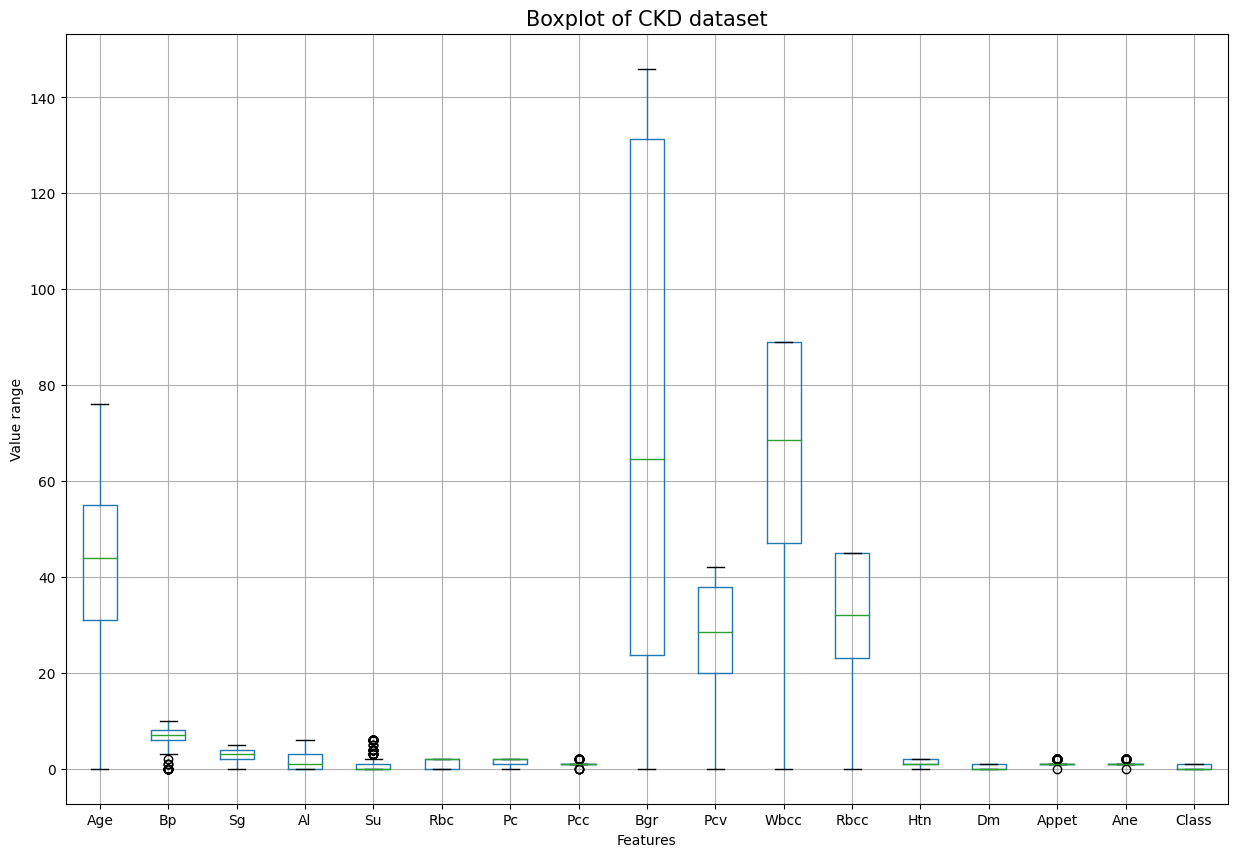

In [ ]:
# Create boxplot
fig, ax = plt.subplots(figsize=(15,10))
df.boxplot(ax=ax)

# Set plot title and axis labels
ax.set_title('Boxplot of CKD dataset', fontsize=15)
ax.set_xlabel('Features', fontsize=10)
ax.set_ylabel('Value range', fontsize=10)

# Show plot
plt.show()

In [ ]:
#Split the data into 70% training and 30% testing 
X_train,  X_test, y_train, y_test = train_test_split(
        X, y, test_size= 0.3, shuffle=True)

In [ ]:
#Build The model (Artificial Neural Network)
# Function to create the Keras model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=len(X.columns), kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
    model.add(Dense(64, input_dim=len(X.columns), kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
    model.add(Dense(64, input_dim=len(X.columns), kernel_initializer=k.initializers.random_normal(seed=13), activation="relu"))
    model.add(Dense(1, activation="sigmoid"))  # Update activation to sigmoid
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
from keras.layers import Dropout

model = Sequential()
model.add(Dense(64, input_dim=len(X.columns),             
                kernel_initializer=k.initializers.random_normal(seed=13), 
                activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, input_dim=len(X.columns),             
                kernel_initializer=k.initializers.random_normal(seed=13), 
                activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(64, input_dim=len(X.columns),              
                kernel_initializer=k.initializers.random_normal(seed=13), 
                activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation="hard_sigmoid"))


In [ ]:
#Compile the model
model.compile(loss='binary_crossentropy', 
                  optimizer='adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
#Train the model
estimator = KerasClassifier(build_fn= create_model, epochs=500, batch_size=X.shape[0], 
                            validation_split=0.2, callbacks=[early_stopping])


<ipython-input-438-f7d8cc8b758e>:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn= create_model, epochs=500, batch_size=X.shape[0],


In [ ]:
history = model.fit(X, y, epochs=70, batch_size=32, 
                    validation_split=0.2,
                    callbacks=[early_stopping])

Epoch 1/70
10/10 [==============================] - 1s 25ms/step - loss: 0.6677 - accuracy: 0.7844 - val_loss: 0.7845 - val_accuracy: 0.0000e+00
Epoch 2/70
10/10 [==============================] - 0s 7ms/step - loss: 0.5821 - accuracy: 0.7812 - val_loss: 1.1340 - val_accuracy: 0.0000e+00
Epoch 3/70
10/10 [==============================] - 0s 7ms/step - loss: 0.4769 - accuracy: 0.7812 - val_loss: 1.4633 - val_accuracy: 0.0000e+00
Epoch 4/70
10/10 [==============================] - 0s 7ms/step - loss: 0.4400 - accuracy: 0.7812 - val_loss: 1.2129 - val_accuracy: 0.0000e+00
Epoch 5/70
10/10 [==============================] - 0s 8ms/step - loss: 0.3993 - accuracy: 0.7812 - val_loss: 1.2484 - val_accuracy: 0.0000e+00
Epoch 6/70
10/10 [==============================] - 0s 6ms/step - loss: 0.4007 - accuracy: 0.7812 - val_loss: 1.2071 - val_accuracy: 0.0000e+00
Epoch 7/70
10/10 [==============================] - 0s 8ms/step - loss: 0.3682 - accuracy: 0.7812 - val_loss: 0.9041 - val_accuracy: 0.

In [ ]:
#Save the model
model.save("ckd.model")

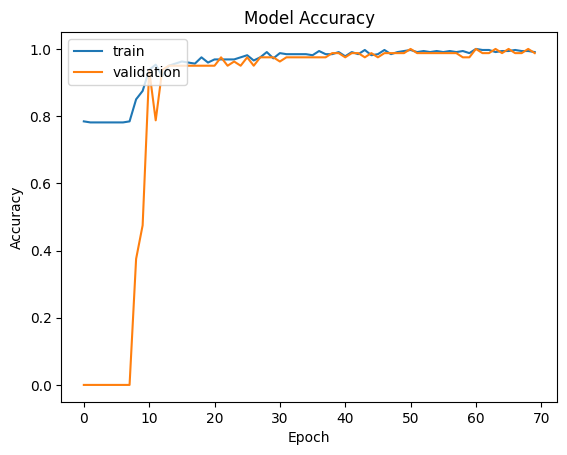

In [ ]:
#Visualize the models accuracy and loss
# Plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

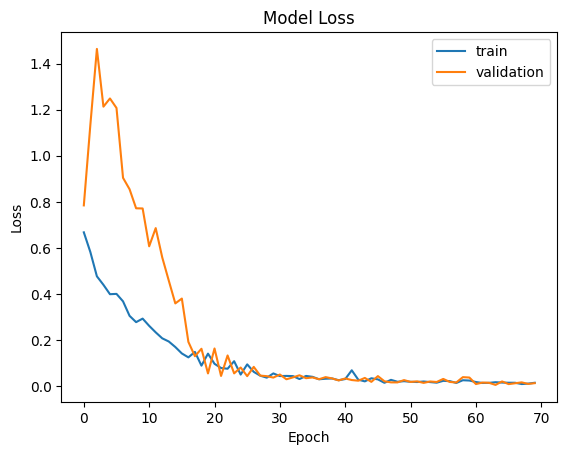

In [ ]:
# Plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
print("Shape of training data: ", X_train.shape)
print("Shape of test data: ", X_test.shape )

Shape of training data:  (280, 16)
Shape of test data:  (120, 16)


In [ ]:
from sklearn.metrics import confusion_matrix

# load the model
model = load_model("ckd.model")

# predict on the test set
y_pred = model.predict(X_test)

# convert probabilities to binary predictions
y_pred_binary = [1 if prob >= 0.5 else 0 for prob in y_pred]

# create the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)
# print the confusion matrix
print(cm)

4/4 [==============================] - 0s 2ms/step
[[73  0]
 [ 1 46]]


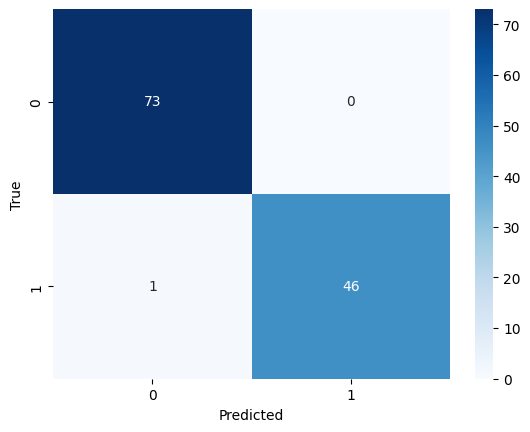

In [ ]:
import seaborn as sns

# plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
for model_file in glob.glob("*.model"):
  print("Model file: ", model_file)
  model = load_model(model_file)
  pred = model.predict(X_test)
  #Threshold, transforming probabilities to either 0 or 1 
  #depending if the probability is below or above 0.5
  pred = [1 if y>=0.5 else 0 for y in pred] 
  scores = model.evaluate(X_test, y_test)
  print()
  print("Original: {0}".format(", ".join([str(x) for x in y_test])))
  print()
  print("Predicted:{0}".format(", ".join([str(x) for x in pred])))
  print() 
  print("Scores: loss = ", scores[0], " accuracy = ", scores[1])
  print()

Model file:  ckd.model
4/4 [==============================] - 0s 4ms/step - loss: 0.0117 - accuracy: 0.9917

Original: 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1

Predicted:0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1

Scores: loss =  0.011733129620552063  accuracy =  0.9916666746139526

